In [ ]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
samikshadalvi_pcos_diagnosis_dataset_path = kagglehub.dataset_download('samikshadalvi/pcos-diagnosis-dataset')

print('Data source import complete.')


100%|██████████| 6.96k/6.96k [00:00<00:00, 3.12MB/s]

Extracting files...
Data source import complete.


# 🏥 Deteksi PCOS Menggunakan Machine Learning  

## 📌 Pendahuluan  

Polycystic Ovary Syndrome (PCOS) adalah salah satu gangguan endokrin paling umum yang mempengaruhi wanita usia reproduksi. Gangguan ini ditandai dengan ketidakseimbangan hormon, siklus menstruasi tidak teratur, dan kista ovarium, yang dapat menyebabkan komplikasi seperti infertilitas, resistensi insulin, dan gangguan metabolik.  

🩺 Deteksi dini dan diagnosis yang akurat sangat penting untuk penanganan dan pengobatan yang efektif. Dalam proyek ini, kami memanfaatkan teknik machine learning 🤖 untuk menganalisis dataset yang berisi 1.000 pasien, menggunakan berbagai model klasifikasi untuk memprediksi diagnosis PCOS berdasarkan indikator kesehatan utama.  

## 📊 Tentang Dataset  

Dataset ini berisi informasi terkait pasien dengan Polycystic Ovary Syndrome (PCOS), sebuah gangguan hormonal umum yang mempengaruhi wanita usia reproduksi. Dataset ini terdiri dari 1.000 entri, masing-masing mewakili seorang pasien, dan mencakup lima fitur utama yang sering dikaitkan dengan diagnosis serta faktor risiko PCOS. Fitur-fitur ini memberikan wawasan berharga mengenai kondisi kesehatan pasien dan dapat digunakan untuk analisis eksplorasi data (EDA), rekayasa fitur, serta pengembangan model machine learning untuk memprediksi diagnosis PCOS.  

### 🔍 Fitur:  
- **Usia (tahun):** Usia pasien, berkisar antara 18 hingga 45 tahun.  
- **BMI (kg/m²):** Indeks Massa Tubuh, ukuran lemak tubuh berdasarkan tinggi dan berat badan, berkisar antara 18 hingga 35.  
- **Ketidakteraturan Menstruasi (biner):** Indikator biner yang menunjukkan apakah pasien memiliki siklus menstruasi tidak teratur (0 = Tidak, 1 = Ya).  
- **Tingkat Testosteron (ng/dL):** Kadar testosteron dalam darah pasien, yang merupakan indikator hormonal penting untuk PCOS, berkisar antara 20 hingga 100 ng/dL.  
- **Jumlah Folikel Antral:** Jumlah folikel antral yang terdeteksi selama pemeriksaan ultrasonografi, berkisar antara 5 hingga 30, yang membantu menilai cadangan ovarium dan keberadaan PCOS.  

### 🎯 Variabel Target:  
- **Diagnosis PCOS (biner):** Indikator biner yang menunjukkan apakah pasien didiagnosis dengan PCOS (0 = Tidak, 1 = Ya), berdasarkan kombinasi faktor risiko seperti BMI tinggi, kadar testosteron, ketidakteraturan menstruasi, dan jumlah folikel antral.  

## 🏗️ Metodologi  
1. **Analisis Data Eksplorasi (EDA):** Memvisualisasikan distribusi fitur, korelasi, dan tren.  
2. **Rekayasa Fitur:** Mengidentifikasi indikator utama untuk pelatihan model.  
3. **Model Machine Learning:** Melatih dan mengevaluasi beberapa model klasifikasi:  
   - Random Forest  
   - Regresi Logistik  
   - Support Vector Machine (Linear & RBF)  
   - K-Nearest Neighbors  
   - Decision Tree  
   - XGBoost  
   - Naïve Bayes  
4. **Evaluasi Performa:** Membandingkan akurasi model, presisi, recall, dan skor F1.  


## 1. Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("samikshadalvi/pcos-diagnosis-dataset")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/samikshadalvi/pcos-diagnosis-dataset/versions/1


In [ ]:
path = os.path.join(path, "pcos_dataset.csv")
df = pd.read_csv(path)

## 2. Dataset Study

In [ ]:
df.head()

,Age,BMI,Menstrual_Irregularity,Testosterone_Level(ng/dL),Antral_Follicle_Count,PCOS_Diagnosis
0,24,34.7,1,25.2,20,0
1,37,26.4,0,57.1,25,0
2,32,23.6,0,92.7,28,0
3,28,28.8,0,63.1,26,0
4,25,22.1,1,59.8,8,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Age                        1000 non-null   int64  
 1   BMI                        1000 non-null   float64
 2   Menstrual_Irregularity     1000 non-null   int64  
 3   Testosterone_Level(ng/dL)  1000 non-null   float64
 4   Antral_Follicle_Count      1000 non-null   int64  
 5   PCOS_Diagnosis             1000 non-null   int64  
dtypes: float64(2), int64(4)
memory usage: 47.0 KB


In [ ]:
df.describe()

,Age,BMI,Menstrual_Irregularity,Testosterone_Level(ng/dL),Antral_Follicle_Count,PCOS_Diagnosis
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,31.771000,26.38700,0.530000,60.159500,17.469000,0.199000
std,8.463462,4.93554,0.499349,23.160204,7.069301,0.399448
min,18.000000,18.10000,0.000000,20.000000,5.000000,0.000000
25%,24.000000,21.90000,0.000000,41.700000,12.000000,0.000000
50%,32.000000,26.40000,1.000000,60.000000,18.000000,0.000000
75%,39.000000,30.50000,1.000000,80.300000,23.250000,0.000000
max,45.000000,35.00000,1.000000,99.800000,29.000000,1.000000


In [ ]:
df.isnull().sum()

,0
Age,0
BMI,0
Menstrual_Irregularity,0
Testosterone_Level(ng/dL),0
Antral_Follicle_Count,0
PCOS_Diagnosis,0


In [ ]:
df.duplicated().sum()

0

In [ ]:
df.corr()

,Age,BMI,Menstrual_Irregularity,Testosterone_Level(ng/dL),Antral_Follicle_Count,PCOS_Diagnosis
Age,1.000000,-0.049455,0.032300,-0.050129,0.017841,-0.064675
BMI,-0.049455,1.000000,0.031189,0.003811,0.030724,0.377852
Menstrual_Irregularity,0.032300,0.031189,1.000000,0.042694,0.035851,0.469376
Testosterone_Level(ng/dL),-0.050129,0.003811,0.042694,1.000000,0.011976,0.200817
Antral_Follicle_Count,0.017841,0.030724,0.035851,0.011976,1.000000,0.192014
PCOS_Diagnosis,-0.064675,0.377852,0.469376,0.200817,0.192014,1.000000


## 3. Data Visualization

### Understanding The Data Distribution Across PCOS Diagnosis

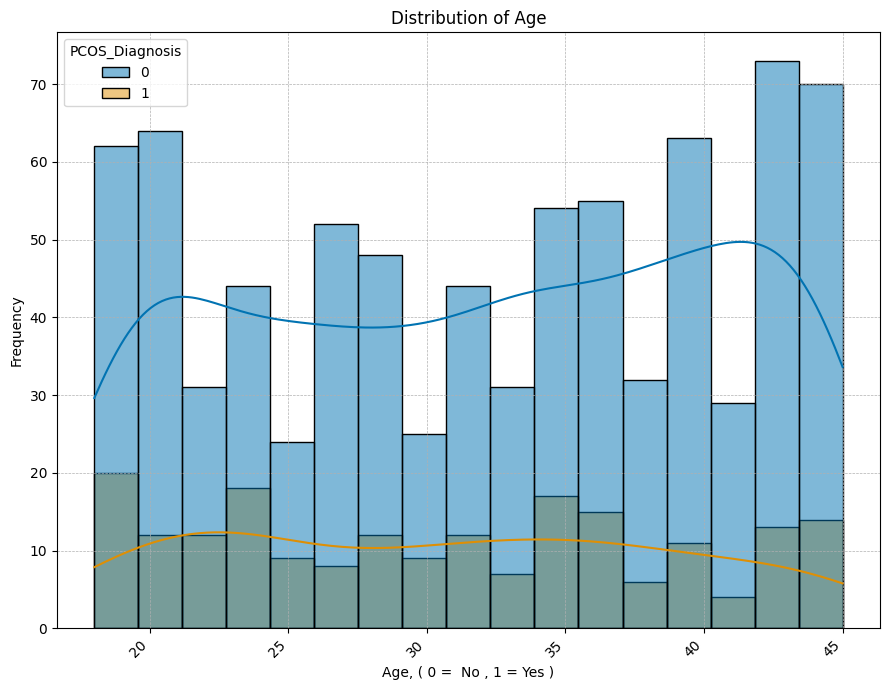

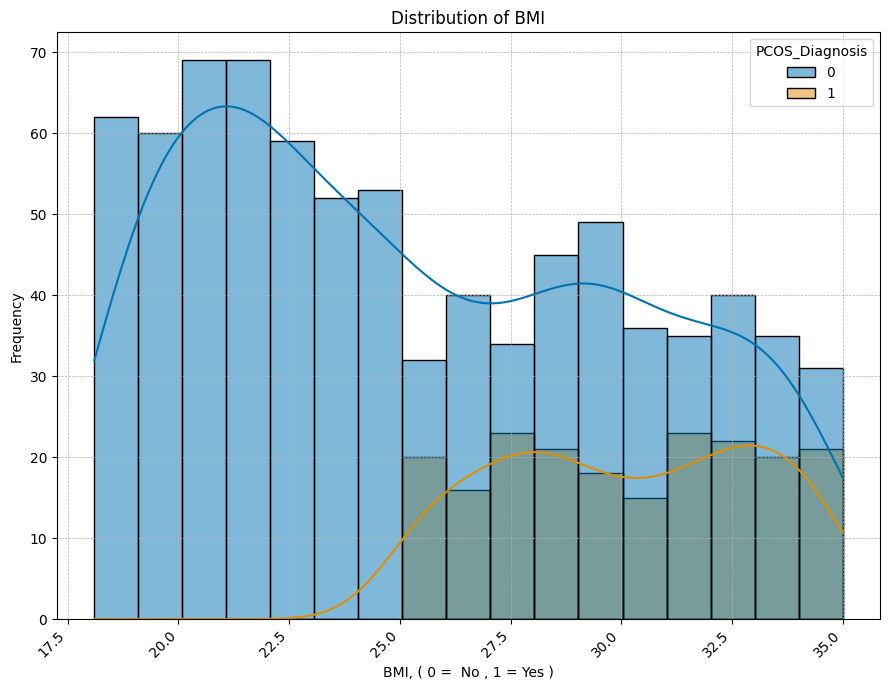

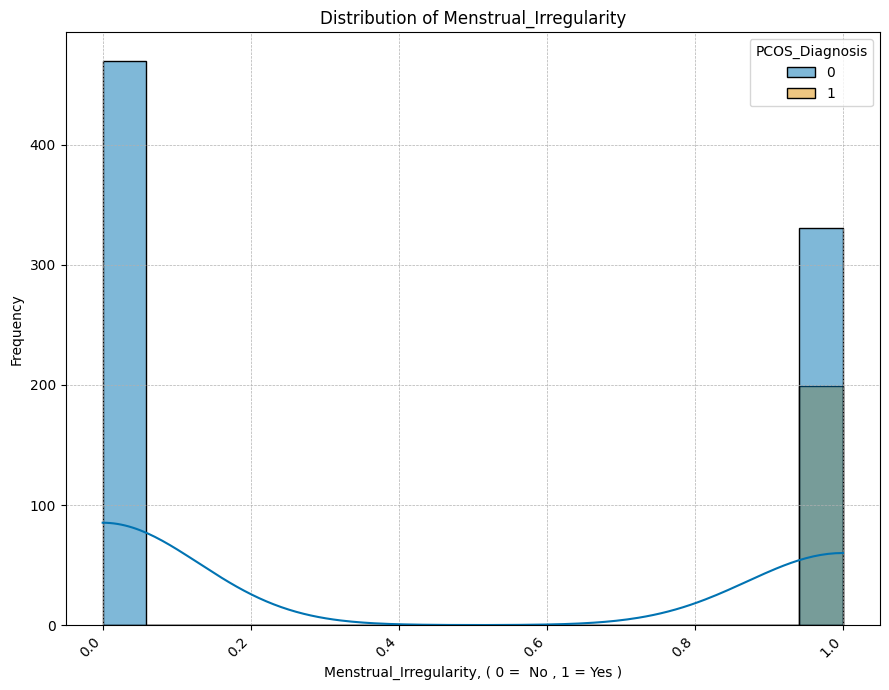

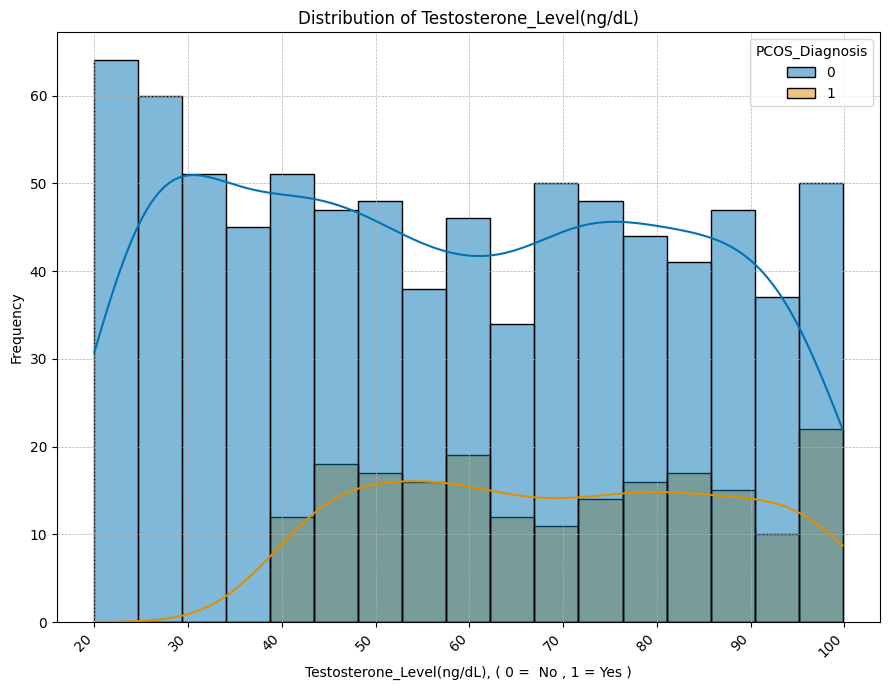

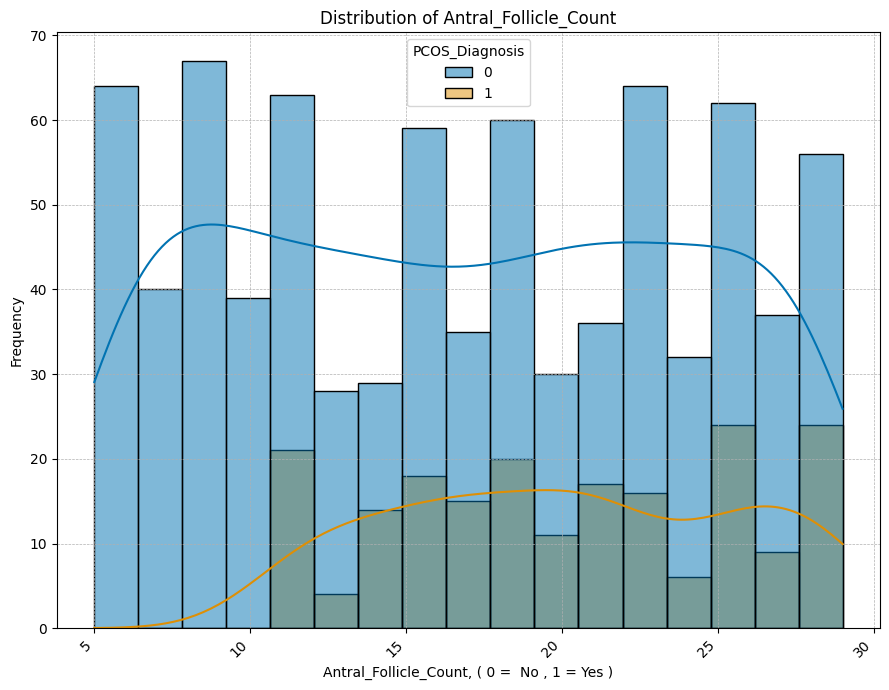

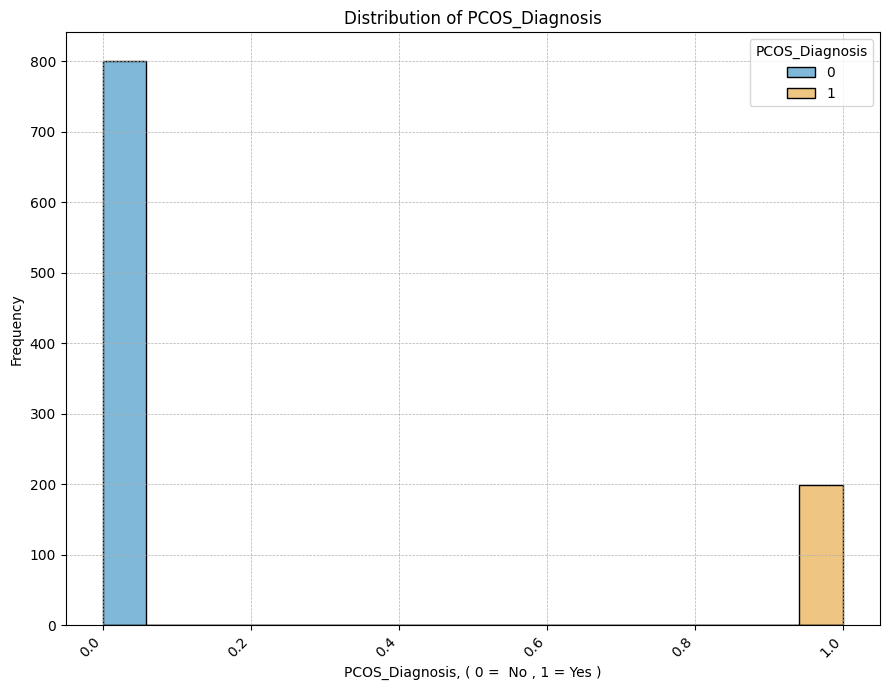

In [ ]:
for i in df.columns:
  plt.figure(figsize=(9,7))
  sns.histplot(x=i,kde=True,hue='PCOS_Diagnosis',palette='colorblind',data=df,bins=17)

  plt.xlabel(i+', ( 0 =  No , 1 = Yes )')
  plt.ylabel("Frequency")
  plt.title("Distribution of {}".format(i))
  plt.xticks(rotation=45, ha='right')
  plt.tight_layout()
  plt.grid(linestyle = '--', linewidth = 0.5)
  plt.show()
  print("\n")

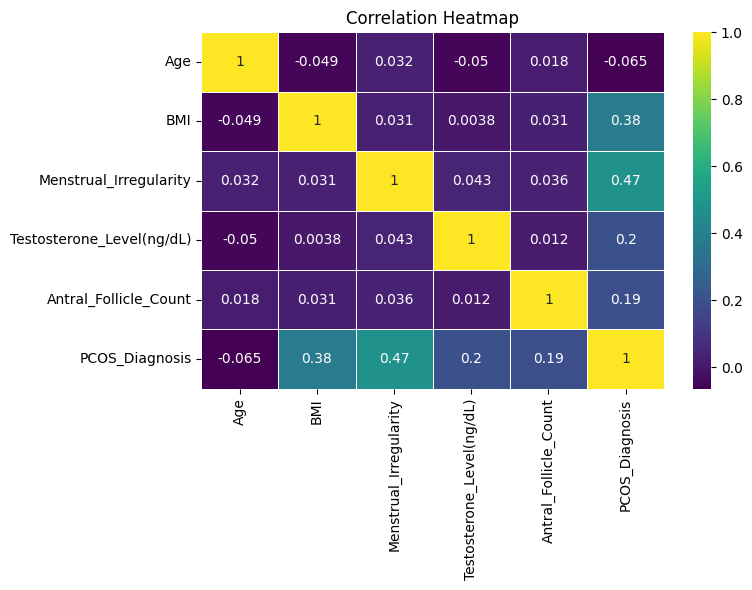

In [ ]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(),annot=True,cmap='viridis',linewidths=0.5)
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()

### Visualizing Key Features - BMI, Menstrual Irregularity & Testosterone_Level

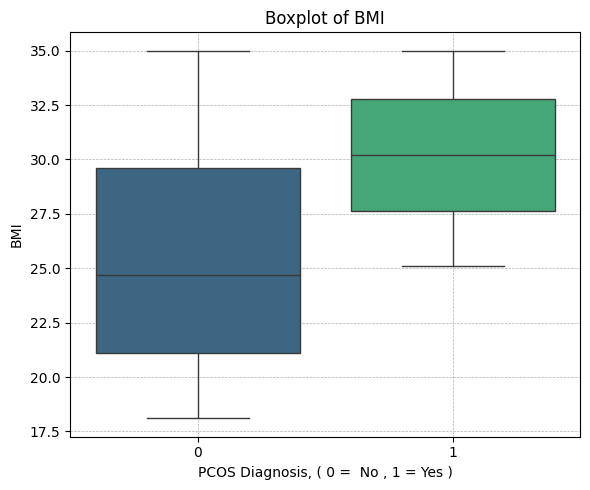

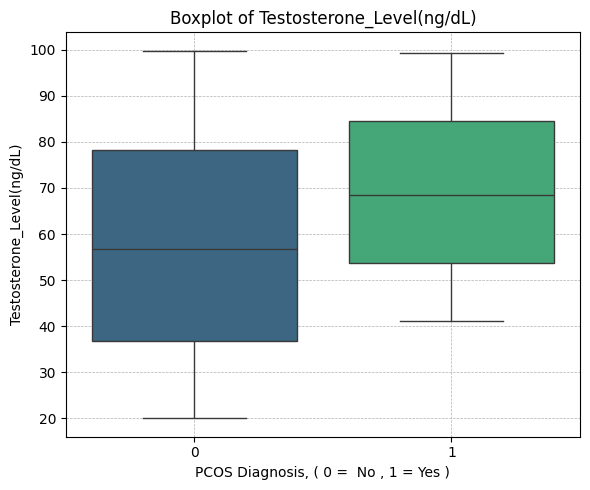

In [ ]:
key_features = ['BMI','Testosterone_Level(ng/dL)']
for i in key_features:
  plt.figure(figsize=(6,5))
  sns.boxplot(x='PCOS_Diagnosis',y=i,data=df,palette='viridis')
  plt.xlabel('PCOS Diagnosis, ( 0 =  No , 1 = Yes )')
  plt.ylabel(i)
  plt.title("Boxplot of {}".format(i))
  plt.grid(linestyle = '--', linewidth = 0.5)
  plt.tight_layout()
  plt.show()
  print("\n")

Text(0.5, 1.0, 'Countplot of Menstrual Irregularity')

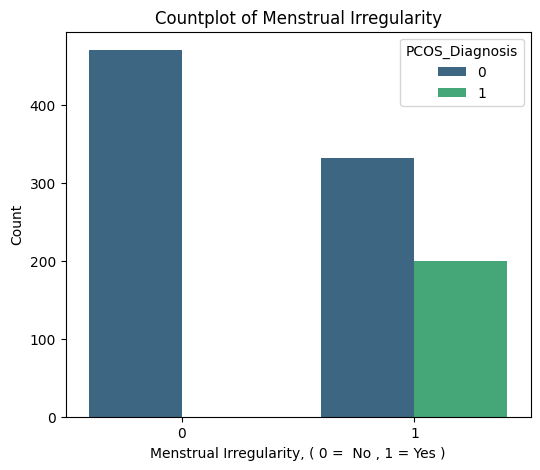

In [ ]:
plt.figure(figsize=(6,5))
sns.countplot(x='Menstrual_Irregularity',hue='PCOS_Diagnosis',data=df,palette='viridis')
plt.xlabel('Menstrual Irregularity, ( 0 =  No , 1 = Yes )')
plt.ylabel('Count')
plt.title("Countplot of Menstrual Irregularity")

## 4. Machine Learning & Classification Models Comparison

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import accuracy_score, classification_report

In [ ]:
X = df[['Age', 'BMI', 'Menstrual_Irregularity', 'Testosterone_Level(ng/dL)', 'Antral_Follicle_Count']]
y= df['PCOS_Diagnosis']

### Split Data

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Feature Scaling

In [ ]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### Model Initialization & Implementation

In [ ]:
import time

models = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'Logistic Regression': LogisticRegression(random_state=42),
    'Support Vector Machine RBF': SVC(random_state=42,kernel='rbf'),
    'Support Vector Machine Linear': SVC(random_state=42,kernel='linear'),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'XGBoost': XGBClassifier(random_state=42),
    'Naive Bayes': GaussianNB()
}

In [ ]:
for name, model in models.items():
    start_time = time.time()

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    end_time = time.time()
    execution_time = end_time - start_time  # Compute execution time

    accuracy = accuracy_score(y_test, y_pred)

    print(f"{name}'s Accuracy: {accuracy:.4f}")
    print(f"Implementation Time: {execution_time:.4f} seconds\n")
    print(classification_report(y_test, y_pred))
    print("=" * 50)
    print("\n")

Random Forest's Accuracy: 0.9900
Implementation Time: 0.1942 seconds

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       161
           1       1.00      0.95      0.97        39

    accuracy                           0.99       200
   macro avg       0.99      0.97      0.98       200
weighted avg       0.99      0.99      0.99       200



Logistic Regression's Accuracy: 0.8850
Implementation Time: 0.0198 seconds

              precision    recall  f1-score   support

           0       0.92      0.94      0.93       161
           1       0.72      0.67      0.69        39

    accuracy                           0.89       200
   macro avg       0.82      0.80      0.81       200
weighted avg       0.88      0.89      0.88       200



Support Vector Machine RBF's Accuracy: 0.9600
Implementation Time: 0.0080 seconds

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       161
    

## 📊 Perbandingan Performa Model  

Berikut adalah hasil akurasi, laporan klasifikasi, dan waktu implementasi untuk berbagai model machine learning yang digunakan dalam diagnosis PCOS.  

### 1. Random Forest  
- **Accuracy:** 99.00%  
- **Implementation Time:** 0.1783 seconds  
- **Precision:** 0.99  
- **Recall:** 1.00 (Class 0), 0.95 (Class 1)  
- **F1-Score:** 0.99 (Class 0), 0.97 (Class 1)  

### 2. Logistic Regression  
- **Accuracy:** 88.50%  
- **Implementation Time:** 0.0059 seconds  
- **Precision:** 0.92 (Class 0), 0.72 (Class 1)  
- **Recall:** 0.94 (Class 0), 0.67 (Class 1)  
- **F1-Score:** 0.93 (Class 0), 0.69 (Class 1)  

### 3. Support Vector Machine (RBF)  
- **Accuracy:** 96.00%  
- **Implementation Time:** 0.0089 seconds  
- **Precision:** 0.98 (Class 0), 0.90 (Class 1)  
- **Recall:** 0.98 (Class 0), 0.90 (Class 1)  
- **F1-Score:** 0.98 (Class 0), 0.90 (Class 1)  

### 4. Support Vector Machine (Linear)  
- **Accuracy:** 89.50%  
- **Implementation Time:** 0.0100 seconds  
- **Precision:** 0.93 (Class 0), 0.74 (Class 1)  
- **Recall:** 0.94 (Class 0), 0.72 (Class 1)  
- **F1-Score:** 0.93 (Class 0), 0.73 (Class 1)  

### 5. K-Nearest Neighbors  
- **Accuracy:** 96.50%  
- **Implementation Time:** 0.0132 seconds  
- **Precision:** 0.98 (Class 0), 0.92 (Class 1)  
- **Recall:** 0.98 (Class 0), 0.90 (Class 1)  
- **F1-Score:** 0.98 (Class 0), 0.91 (Class 1)  

### 6. Decision Tree  
- **Accuracy:** 99.50%  
- **Implementation Time:** 0.0026 seconds  
- **Precision:** 0.99  
- **Recall:** 1.00 (Class 0), 0.97 (Class 1)  
- **F1-Score:** 1.00 (Class 0), 0.99 (Class 1)  

### 7. XGBoost  
- **Accuracy:** 99.50%  
- **Implementation Time:** 0.0332 seconds  
- **Precision:** 0.99  
- **Recall:** 1.00 (Class 0), 0.97 (Class 1)  
- **F1-Score:** 1.00 (Class 0), 0.99 (Class 1)  

### 8. Naive Bayes  
- **Accuracy:** 69.50%  
- **Implementation Time:** 0.0019 seconds  
- **Precision:** 1.00 (Class 0), 0.39 (Class 1)  
- **Recall:** 0.62 (Class 0), 1.00 (Class 1)  
- **F1-Score:** 0.77 (Class 0), 0.56 (Class 1)  

## 🔍 Observasi  
- **Model dengan Performa Terbaik:** Decision Tree, XGBoost, dan Random Forest mencapai akurasi tertinggi (~99,50%).  
- **Decision Tree adalah model tercepat di antara model terbaik**, dengan waktu implementasi 0,0026s.  
- **SVM (RBF) dan KNN** menunjukkan performa yang baik dengan akurasi di atas 96%, meskipun KNN memerlukan waktu implementasi yang lebih lama (0,0132s).  
- **Naive Bayes** adalah model dengan eksekusi tercepat (0,0019s), tetapi memiliki akurasi terendah (69,50%), sehingga kurang cocok untuk dataset ini.  
- **Logistic Regression dan Linear SVM** menunjukkan performa sedang tetapi mengalami kesulitan dalam memprediksi Kelas 1.  
- **Random Forest** memiliki akurasi tinggi (99%) tetapi membutuhkan waktu implementasi paling lama (0,1783s), sehingga kurang efisien dibandingkan XGBoost dan Decision Tree.

## 5. Plotting Best Models

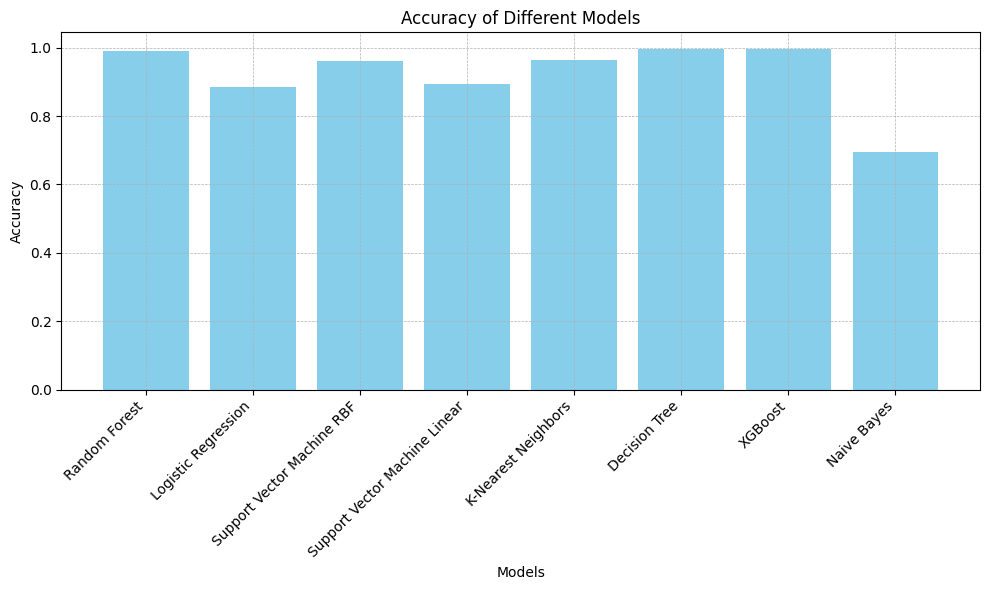

In [ ]:
plt.figure(figsize=(10, 6))
plt.bar(models.keys(), [accuracy_score(y_test, model.predict(X_test)) for model in models.values()], color='skyblue')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy of Different Models')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.grid(linestyle = '--', linewidth = 0.5)
plt.show()

## 🏆 Kesimpulan  

Setelah mengevaluasi beberapa model machine learning untuk **diagnosis PCOS**, berikut adalah beberapa poin utama yang dapat disimpulkan:  

### Pilihan Model Terbaik:  
1. **Decision Tree & XGBoost** – Mencapai akurasi tertinggi (99,50%) dengan presisi, recall, dan F1-score yang kuat. Decision Tree merupakan model tercepat di antara keduanya (0,0026s).  
2. **Random Forest** – Berkinerja baik dengan akurasi 99%, meskipun memiliki waktu implementasi terlama (0,1783s).  
3. **SVM (RBF) & KNN** – Model yang cukup andal dengan akurasi 96%+, tetapi KNN membutuhkan lebih banyak waktu (0,0132s).  

### Performa vs. Kecepatan:  
- **Model Tercepat:** Naive Bayes (0,0019s), tetapi memiliki akurasi terendah (69,50%).  
- **Performa Seimbang:** XGBoost dan Decision Tree memberikan keseimbangan yang baik antara akurasi dan kecepatan.  

### Pilihan Model yang Kurang Optimal:  
- **Naive Bayes** mengalami kesulitan dalam menangani ketidakseimbangan kelas, sehingga kurang cocok untuk dataset ini.  
- **Logistic Regression & Linear SVM** memiliki performa sedang tetapi kurang andal dalam memprediksi Kelas 1, sehingga kurang direkomendasikan.  

### Rekomendasi Akhir:  
Untuk akurasi tinggi dan efisiensi, **Decision Tree atau XGBoost** adalah pilihan terbaik. Jika kecepatan bukan kendala utama, Random Forest juga merupakan opsi yang sangat baik.  